In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [3]:
dataset = pd.read_csv("diebeties.csv")
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# to get mathematical aspects of dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
# to check the number of null rows 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
# to verify 
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
# to check the duplicated rows...
dataset.duplicated().sum()

0

Text(0.5, 1.0, 'correlation heatmap')

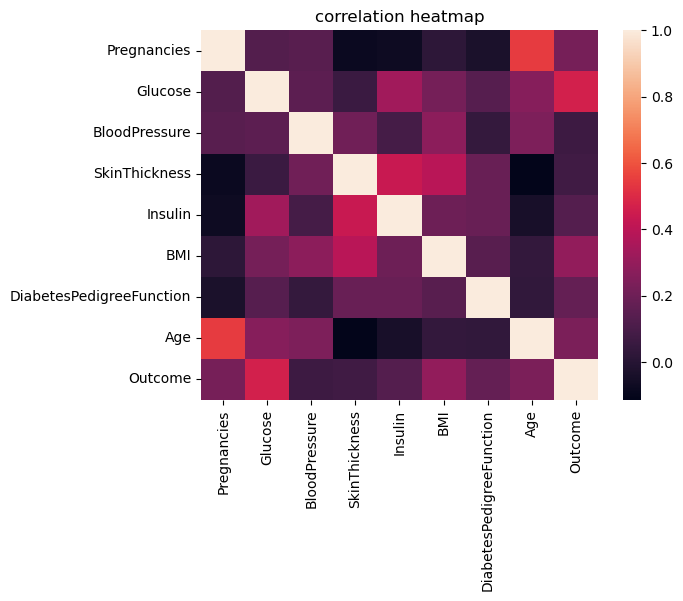

In [39]:
plt.figure()
corr_data=dataset.corr(method="pearson")
#pearson is the default also and it calculates linear or non linear that is any sort of correlation!
sns.heatmap(corr_data)
plt.title('correlation heatmap')

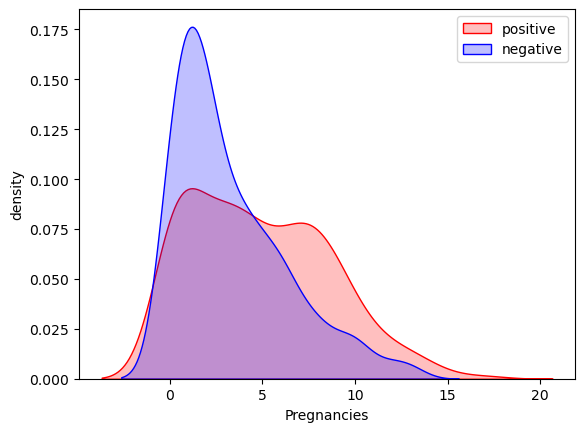

In [53]:
plt.figure()
kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome'] == 1], color = 'red', fill = True)
kde = sns.kdeplot(dataset['Pregnancies'][dataset['Outcome'] == 0], color = 'blue', fill = True)
kde.set_xlabel('Pregnancies')
kde.set_ylabel('density')
kde.legend(['positive', 'negative'])

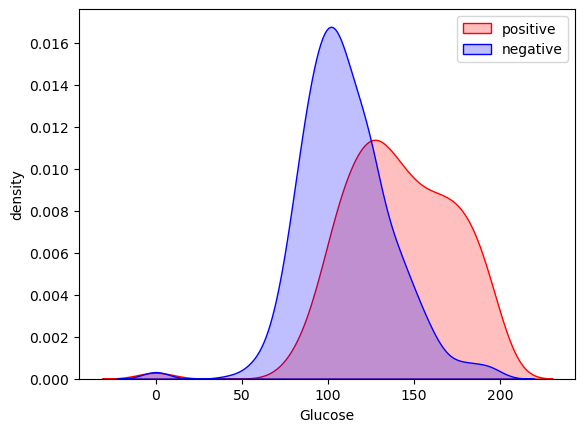

In [51]:
plt.figure()
kde = sns.kdeplot(dataset['Glucose'][dataset['Outcome'] == 1], color = 'red', fill = True)
kde = sns.kdeplot(dataset['Glucose'][dataset['Outcome'] == 0], color = 'blue', fill = True)
kde.set_xlabel('Glucose')
kde.set_ylabel('density')
kde.legend(['positive', 'negative'])

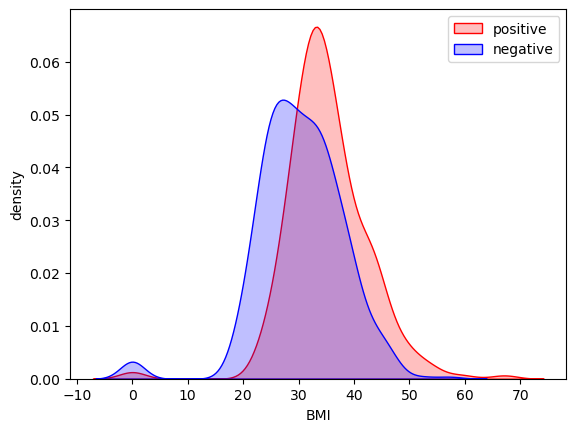

In [49]:
plt.figure()
kde = sns.kdeplot(dataset['BMI'][dataset['Outcome'] == 1], color = 'red', fill = True)
kde = sns.kdeplot(dataset['BMI'][dataset['Outcome'] == 0], color = 'blue', fill = True)
kde.set_xlabel('BMI')
kde.set_ylabel('density')
kde.legend(['positive', 'negative'])

<Axes: xlabel='Outcome', ylabel='Glucose'>

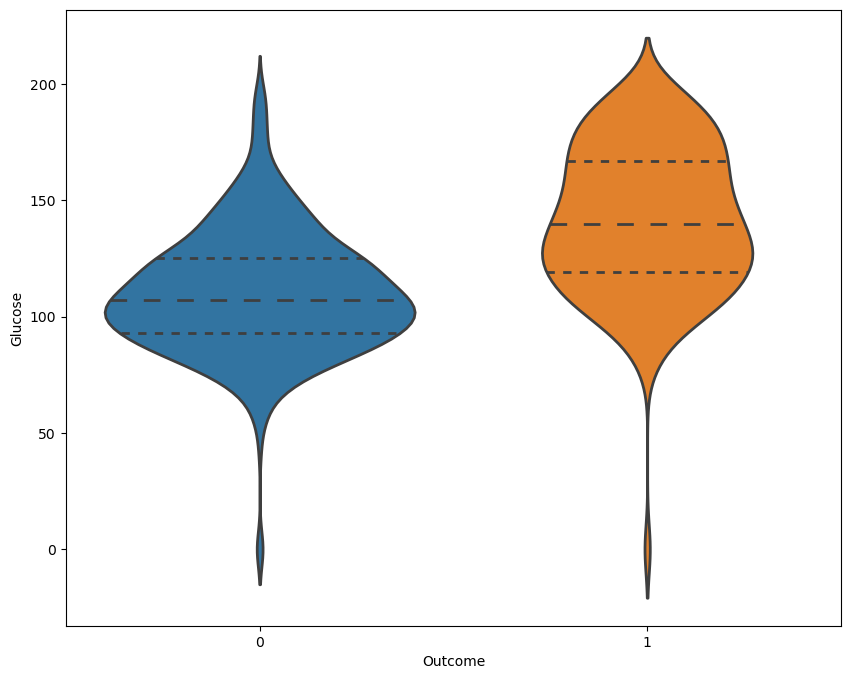

In [34]:
plt.figure(figsize = (10,8))
sns.violinplot(data = dataset, x = 'Outcome', y = 'Glucose', split = True, linewidth=2, inner= 'quart')

In [5]:
dataset['Glucose'] = dataset['Glucose'].replace(0,dataset['Glucose'][dataset['Glucose']!=0].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0,dataset['BloodPressure'][dataset['BloodPressure']!=0].mean())
dataset['Insulin'] = dataset['Insulin'].replace(0,dataset['Insulin'][dataset['Insulin']!=0].mean())
dataset['BMI'] = dataset['BMI'].replace(0,dataset['BMI'][dataset['BMI']!=0].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0,dataset['SkinThickness'][dataset['SkinThickness']!=0].mean())

In [37]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [7]:
x = dataset.drop(['Outcome'], axis = 1)
y = dataset['Outcome']

In [39]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115.0,98.000000,29.15342,155.548223,24.0,1.022,34
223,7,142.0,60.000000,33.00000,190.000000,28.8,0.687,61
393,4,116.0,72.000000,12.00000,87.000000,22.1,0.463,37
766,1,126.0,60.000000,29.15342,155.548223,30.1,0.349,47
570,3,78.0,70.000000,29.15342,155.548223,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.00000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,29.15342,155.548223,22.4,0.207,27
270,10,101.0,86.000000,37.00000,155.548223,45.6,1.136,38
435,0,141.0,72.405184,29.15342,155.548223,42.4,0.205,29


In [44]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.000000,58.0,33.00000,190.000000,34.0,0.430,43
324,2,112.000000,75.0,32.00000,155.548223,35.7,0.148,21
624,2,108.000000,64.0,29.15342,155.548223,30.8,0.158,21
690,8,107.000000,80.0,29.15342,155.548223,24.6,0.856,34
473,7,136.000000,90.0,29.15342,155.548223,29.9,0.210,50
...,...,...,...,...,...,...,...,...
311,0,106.000000,70.0,37.00000,148.000000,39.4,0.605,22
429,1,95.000000,82.0,25.00000,180.000000,35.0,0.233,43
182,1,121.686763,74.0,20.00000,23.000000,27.7,0.299,21
586,8,143.000000,66.0,29.15342,155.548223,34.9,0.129,41


In [45]:
y_train

464    0
223    0
393    0
766    1
570    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 514, dtype: int64

In [46]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
311    0
429    1
182    0
586    1
679    0
Name: Outcome, Length: 254, dtype: int64

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    y_test=knn.predict(x_test)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

In [33]:
print('Training Accuracy:', training_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: [1.0, 0.8365758754863813, 0.8287937743190662, 0.811284046692607, 0.811284046692607, 0.8073929961089494, 0.8015564202334631, 0.7879377431906615, 0.7859922178988327, 0.791828793774319]
Test Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


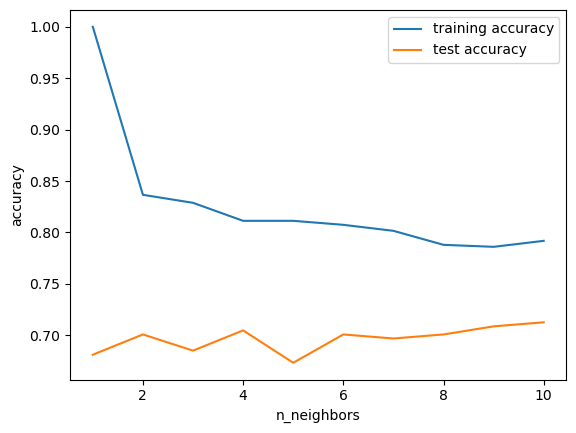

In [50]:
plt.plot(range(1,11), training_accuracy, label = 'training accuracy')
plt.plot(range(1,11), test_accuracy, label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

In [51]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train), 'training score')
print(knn.score(x_test, y_test), 'test score')

0.7859922178988327 training score
0.7086614173228346 test score


In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train), 'training accuracy')
print(dt.score(x_test, y_test), 'test accuracy')

1.0 training accuracy
0.7047244094488189 test accuracy


In [53]:
dt1 = DecisionTreeClassifier(random_state = 0, max_depth = 3)
dt1.fit(x_train, y_train)
print(dt1.score(x_train, y_train), 'training accuracy')
print(dt1.score(x_test, y_test), 'test accuracy')

0.77431906614786 training accuracy
0.6929133858267716 test accuracy


In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 42)
mlp.fit(x_train, y_train)
print(mlp.score(x_train, y_train), 'training accuracy')
print(mlp.score(x_test, y_test), 'test accuracy')

0.7431906614785992 training accuracy
0.6889763779527559 test accuracy


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [57]:
mlp1 = MLPClassifier(random_state = 42)
mlp1.fit(x_train_scaled, y_train)
print(mlp1.score(x_train_scaled, y_train), 'training accuracy')
print(mlp1.score(x_test_scaled, y_test), 'test accuracy')

0.8346303501945526 training accuracy
0.7559055118110236 test accuracy


C:\Users\parij\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
